### Кластеризация

Кластеризация (или кластерный анализ) — это задача разбиения множества объектов на группы, называемые кластерами. Внутри каждой группы должны оказаться «похожие» объекты, а объекты разных группы должны быть как можно более отличны.

Задача кластеризации относится к классу задач обучения без учителя.

Применение кластерного анализа в общем виде сводится к следующим этапам:
 1. Отбор выборки объектов для кластеризации.
 2. Определение множества переменных, по которым будут оцениваться объекты в выборке. При необходимости – нормализация значений переменных.
 3. Вычисление значений меры сходства между объектами.
 4. Применение метода кластерного анализа для создания групп сходных объектов (кластеров).
 5. Представление результатов анализа.

После получения и анализа результатов возможна корректировка выбранной метрики и метода кластеризации до получения оптимального результата.

Для каждой пары объектов измеряется «расстояние» между ними — степень похожести. Существует множество метрик, вот некоторые из них:
1. Евклидово расстояние

Евклидово расстояние - расстояние между двумя точками евклидова пространства, вычисляемое по теореме Пифагора.
$$d_{ij}=\sqrt{\sum_{k=1}^{n}(x_{ik}-x_{jk})^{2}}$$
<img src="clustering_helpers/euclid.jpg">

2. Манхэттенское расстояние (расстояние городских кварталов)

Это расстояние равно сумме модулей разностей их координат. В большинстве случаев эта мера расстояния приводит к таким же результатам, как и для обычного расстояния Евклида. Однако для этой меры влияние отдельных больших разностей (выбросов) уменьшается (т.к. они не возводятся в квадрат).
$$d_{ij}=\sum_{k=1}^{n}\left |x_{ik}-x_{jk}\right |$$
<img src="clustering_helpers/Taxicab.png">

3. Расстояние Чебышева

Это расстояние может оказаться полезным, когда нужно определить два объекта как «различные», если они различаются по какой-либо одной координате. Расстояние Чебышева вычисляется по формуле:
$$d_{ij}=max_{k=1...n}\left |x_{ik}-x_{jk}\right |$$
<img src="clustering_helpers/cher.png">

4. Расстояние Левенштейна

Расстояние Левенштейна — метрика, измеряющая разность между двумя последовательностями символов. Она определяется как минимальное количество односимвольных операций(удаление, вставка, замена), необходимых для превращения одной последовательности символов в другую.

    D — удалить, I — вставить, R — заменить, M — совпадение
<img src="clustering_helpers/lev.png">

5. Косинусное сходство (косинусное расстояние)

Косинусное сходство — это мера сходства между двумя векторами предгильбертового пространства, которая используется для измерения косинуса угла между ними. Если два объекта находятся на одной прямой, проходящей между началом координат, эти объекты считаются одинаковыми (расстояние равно нулю)
$$cos(\theta) = \frac{A\cdot B}{\left \| A \right \|\left \| B \right \|} = \frac{\sum_{i=1}^{n}A_{i}* B_{i}}{\sqrt{\sum_{i=1}^{n}(A_{i})^{2}}* \sqrt{\sum_{i=1}^{n}(B_{i})^{2}}}$$
<img src="clustering_helpers/cosin_.png">

Выбор метрики полностью лежит на исследователе, поскольку результаты кластеризации могут существенно отличаться при использовании разных мер.

In [1]:
from sklearn.datasets.samples_generator import make_blobs, make_moons
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### K-means

K-means - один из алгоритм машинного обучения, решающий задачу кластеризации. 

Основная идея алгоритма k-means заключается в том, что данные произвольно разбиваются на кластеры, после чего итеративно перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Цель алгоритма заключается в разделении n наблюдений на k кластеров таким образом, чтобы каждое наблюдение принадлежало ровно одному кластеру, расположенному на наименьшем расстоянии от наблюдения.

In [3]:
from clustering_helpers.my_knn import show_kmeans
from ipywidgets import interact

In [4]:
interact(show_kmeans, step=(0,8,1))

interactive(children=(IntSlider(value=4, description='step', max=8), Output()), _dom_classes=('widget-interact…

<function clustering_helpers.my_knn.show_kmeans(step)>

In [5]:
# фиксируем размер отображаемых картинок
from pylab import rcParams
rcParams['figure.figsize'] = (9, 8)

In [6]:
#генерируем датасет
#1-й пример
X, y = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.80, random_state=40)
# #2-ой пример
# X, y = make_moons(n_samples=300, noise=0.10, random_state=40)

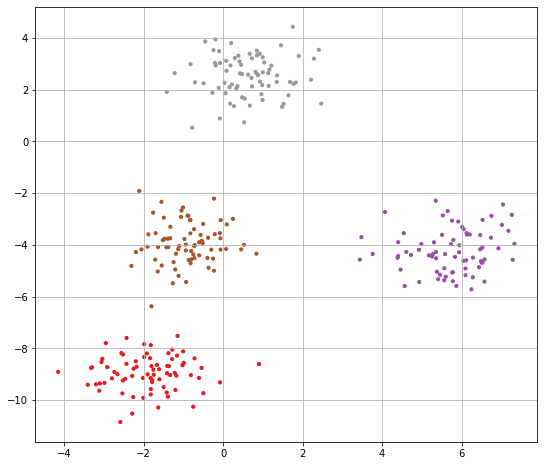

In [7]:
# визуализируем получившееся данные
x_1 = X[:, 0]
x_2 = X[:, 1]
X = np.array(list(zip(x_1, x_2)))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', s=10)
plt.grid()
plt.show()

Напишем функцию создающую центроиды кластеров, для их расположения пользуемся следующей импирикой: для того, что бы кластера не находились в большом удалении от данных, расположим их используя нормальное распределение относительно имеющихся данных

In [8]:
def get_clusters(n_clust,  data):
    """
    генерируем заданное колиичество кластеров
    """
    ax = np.mean(data, axis=0)
    scale = np.std(data, axis=0)
    clusters = np.random.normal(loc=ax, scale=scale, size=(n_clust, data.shape[1]))
    return clusters

In [9]:
def show_knn(X, y_pred, clusters):
    """ отрисовка данных для кажддого кластера """
    all_clusters = []
    for cl in range(clusters.shape[0]):
        cluster = np.array([[0, 0]])
        for i in range(X.shape[0]):
            if y_pred[i]==cl:
                cluster = np.append(cluster, np.array([X[i]]), axis=0)
        all_clusters.append(cluster)

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(clusters.shape[0]):
        plt.scatter(all_clusters[i][1:, 0], all_clusters[i][1:, 1], s=10, c=colors[i])
        plt.scatter(clusters[i][0], clusters[i][1], marker='*', s=200, c=colors[i])
    plt.grid()
    plt.show()

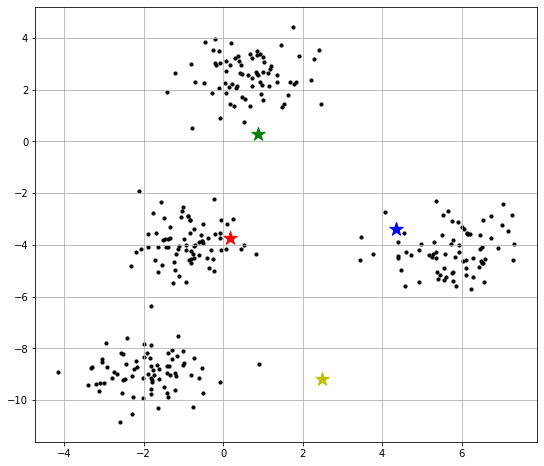

In [10]:
# создаем центроиды наших кластеров
clusters = get_clusters(4, X)

def show_start(clusters):
    """ отрисовка центроидов кластеров """
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.scatter(x_1, x_2, c='#050505', s=10)
    for i in range(clusters.shape[0]):
        plt.scatter(clusters[i][0], clusters[i][1], marker='*', s=200, c=colors[i])
    plt.grid()
    plt.show()
    

show_start(clusters)

Для нашей реализации Kmeans используем евклидово расстояние

$d_{ij}=\sqrt{\sum_{k=1}^{n}(x_{ik}-x_{jk})^{2}}$

In [11]:
def euclidean_dist(instance1, instance2):
    """расчитываем евклидово расстояние между двумя точками"""
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    return np.sqrt(sum((instance1 - instance2)**2))

Нипишем две функции являющимися основами алгоритма Kmeans

In [12]:
def update_y_pred(X, clusters, y_pred):
    """
    назначаем каждому примеру данных значение ближайшего центра кластера
    parameters:
    X - данные
    clusters - центроиды кластеров
    y_pred - принадлежность примера, кластеру
    """
    for i in range(X.shape[0]):
        old_dist = 9e12
        for num, cl in zip(range(clusters.shape[0]), clusters):
            distance = euclidean_dist(X[i], cl)
            if distance < old_dist:
                y_pred[i] = num
                old_dist = distance
    return y_pred


def update_clusters(X, clusters, y_pred):
    """
    перемещаем кластер в центр масс данных, приинадлежащих этому же кластеру
    parameters:
    X - данные
    clusters - центроиды кластеров
    y_pred - принадлежность примера, кластеру
    """
    for clust in range(clusters.shape[0]):
        list_cluster = X[y_pred==clust]
        if len(list_cluster) > 0:
            clusters[clust] = np.mean(list_cluster, axis=0)
    return clusters

In [13]:
%%time
# обучаем модель пока разница между центрами кластеров на n-ом шаге не будет равна на n+1 шаге
y_pred = np.zeros_like(y)
steps = {}

step = 1

clusters_old = np.zeros_like(clusters)
while abs((clusters - clusters_old).sum())>=0.01:
    clusters_old = clusters.copy()
    # определяем принадлежность точки ближайшему кластеру
    y_pred = update_y_pred(X, clusters, y_pred)
    steps[step] = [y_pred.copy(), clusters.copy()] # фиксируем данные для визуализации
    step += 1

    # обновляем центроид кластера
    clusters = update_clusters(X, clusters, y_pred)
    steps[step] = [y_pred.copy(), clusters.copy()] # фиксируем данные для визуализации
    step += 1

Wall time: 53 ms


In [14]:
from ipywidgets import interact

def show_step(step):
    if step == 0:
        show_start(steps[1][1])
    else:
        show_knn(X, steps[step][0], steps[step][1])
    
    
interact(show_step, step=(0,8,1))

interactive(children=(IntSlider(value=4, description='step', max=8), Output()), _dom_classes=('widget-interact…

<function __main__.show_step(step)>

Ссылки на используемую литературу:

    https://ru.wikipedia.org/wiki
    https://studbooks.net/2244345/matematika_himiya_fizika/kosinusnaya_mera
    https://www.researchgate.net
    http://bit.samag.ru/archive/article/1719
    